Final Decision Score: 0.8444444444444444


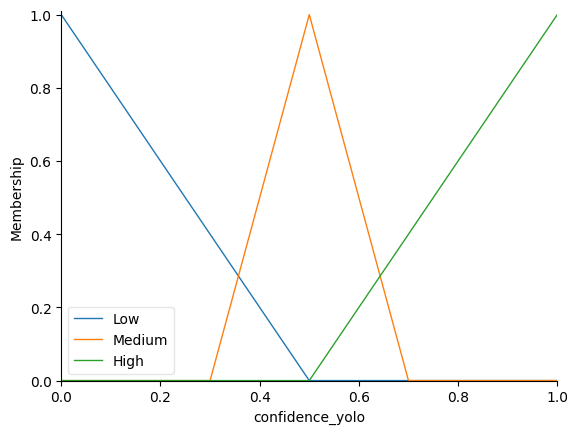

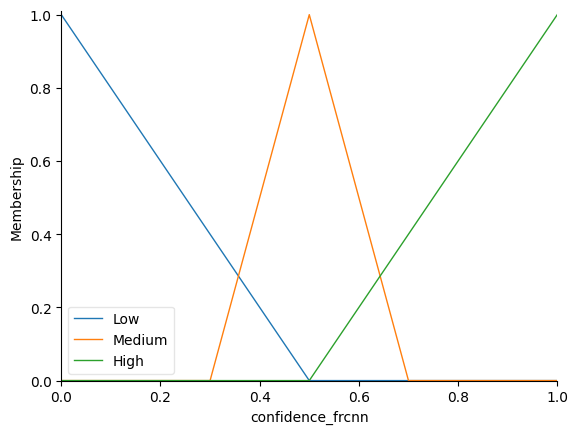

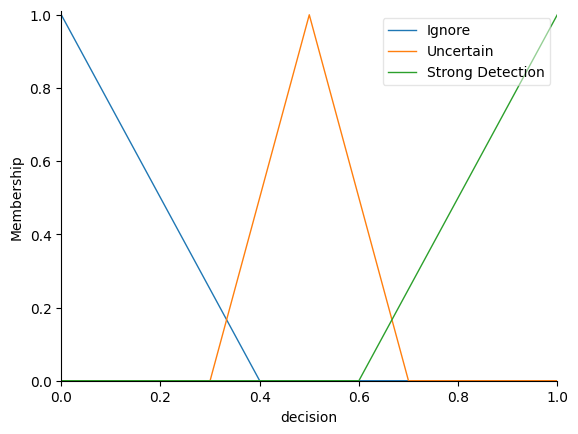

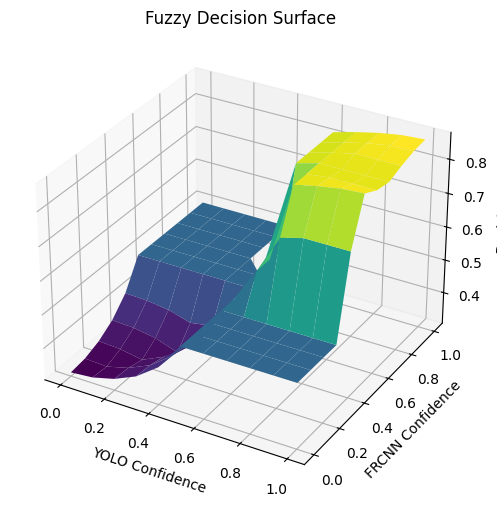

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define fuzzy input variables
confidence_yolo = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'confidence_yolo')
confidence_frcnn = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'confidence_frcnn')

# Define fuzzy output variable
decision = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'decision')

# Define membership functions for confidence scores
confidence_yolo['Low'] = fuzz.trimf(confidence_yolo.universe, [0, 0, 0.5])
confidence_yolo['Medium'] = fuzz.trimf(confidence_yolo.universe, [0.3, 0.5, 0.7])
confidence_yolo['High'] = fuzz.trimf(confidence_yolo.universe, [0.5, 1, 1])

confidence_frcnn['Low'] = fuzz.trimf(confidence_frcnn.universe, [0, 0, 0.5])
confidence_frcnn['Medium'] = fuzz.trimf(confidence_frcnn.universe, [0.3, 0.5, 0.7])
confidence_frcnn['High'] = fuzz.trimf(confidence_frcnn.universe, [0.5, 1, 1])

# Define membership functions for decision
decision['Ignore'] = fuzz.trimf(decision.universe, [0, 0, 0.4])
decision['Uncertain'] = fuzz.trimf(decision.universe, [0.3, 0.5, 0.7])
decision['Strong Detection'] = fuzz.trimf(decision.universe, [0.6, 1, 1])

# Define fuzzy rules
rule1 = ctrl.Rule(confidence_yolo['High'] & confidence_frcnn['Medium'], decision['Strong Detection'])
rule2 = ctrl.Rule(confidence_yolo['Low'] | confidence_frcnn['Low'], decision['Uncertain'])
rule3 = ctrl.Rule(confidence_yolo['Medium'] & confidence_frcnn['Medium'], decision['Uncertain'])
rule4 = ctrl.Rule(confidence_yolo['High'] & confidence_frcnn['High'], decision['Strong Detection'])
rule5 = ctrl.Rule(confidence_yolo['Low'] & confidence_frcnn['Low'], decision['Ignore'])
rule6 = ctrl.Rule(confidence_yolo['Medium'] & confidence_frcnn['Low'], decision['Uncertain'])

# Create control system
fuzzy_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

# Function to get fuzzy decision
def get_fuzzy_decision(yolo_conf, frcnn_conf):
    fuzzy_decision = ctrl.ControlSystemSimulation(fuzzy_control)  # Create a new instance per call
    fuzzy_decision.input['confidence_yolo'] = yolo_conf
    fuzzy_decision.input['confidence_frcnn'] = frcnn_conf
    fuzzy_decision.compute()

    if 'decision' in fuzzy_decision.output:
        return fuzzy_decision.output['decision']
    else:
        return np.nan  # Return NaN if no decision is made

# Example usage
yolo_conf = 0.8
frcnn_conf = 0.6
final_decision = get_fuzzy_decision(yolo_conf, frcnn_conf)
print(f'Final Decision Score: {final_decision}')

# Plot membership functions
def plot_membership():
    confidence_yolo.view()
    confidence_frcnn.view()
    decision.view()
    plt.show()

# Generate 3D Surface Plot
def plot_decision_surface():
    yolo_vals = np.arange(0, 1.1, 0.1)
    frcnn_vals = np.arange(0, 1.1, 0.1)
    Y, F = np.meshgrid(yolo_vals, frcnn_vals)
    Z = np.zeros_like(Y)

    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Z[i, j] = get_fuzzy_decision(Y[i, j], F[i, j])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(Y, F, Z, cmap='viridis')
    ax.set_xlabel('YOLO Confidence')
    ax.set_ylabel('FRCNN Confidence')
    ax.set_zlabel('Decision')
    ax.set_title('Fuzzy Decision Surface')
    plt.show()

# Call these functions to visualize
plot_membership()
plot_decision_surface()


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.4 MB/s eta 0:00:00
